<a href="https://colab.research.google.com/github/SeanBarnier/HAFS_Air-Sea/blob/main/HAFSA_Atmosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieves HAFS-A data from AWS along a storm's track using files generated by getStormTrack.ipynb.

Set up environment

In [2]:
!pip install cfgrib
!pip install cartopy
!pip install tropycal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tropycal: filename=tropycal-1.3-py3-none-any.whl size=242631 sha256=57b174a5b997eb337e9cc7a04849c3b8c712a614a089ff53f9888183f522364c
  Stored in directory: /root/.cache/pip/wheels/45/b3/db/78c9a2a51e8db2d962647d8dd0bb4e1ed5e1005254353de4af
Successfully built tropycal


In [3]:
from tropycal import tracks, rain
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import cfgrib
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cft

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


User parameters

In [4]:
name = "Milton"
tcNum = "14"
filepath = f"/content/drive/MyDrive/savedData/{name}"
trackType = ""

Open TC Data

In [5]:
tc = pd.read_csv(filepath + "/hurdat2_" + name + trackType + ".csv")

In [6]:
tc

,Unnamed: 0,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,0,2024-10-04 18:00:00,0,NaN,LO,21.0,-94.6,30,1009,north_atlantic
1,1,2024-10-05 00:00:00,0,NaN,LO,20.8,-95.2,30,1008,north_atlantic
2,2,2024-10-05 06:00:00,0,NaN,LO,21.4,-95.4,30,1008,north_atlantic
3,3,2024-10-05 12:00:00,0,NaN,TD,22.0,-95.5,30,1008,north_atlantic
4,4,2024-10-05 18:00:00,0,NaN,TS,22.5,-95.5,35,1006,north_atlantic
5,5,2024-10-06 00:00:00,0,NaN,TS,22.7,-95.5,35,1004,north_atlantic
6,6,2024-10-06 06:00:00,0,NaN,TS,22.6,-95.2,45,999,north_atlantic
7,7,2024-10-06 12:00:00,0,NaN,TS,22.5,-94.8,55,991,north_atlantic
8,8,2024-10-06 18:00:00,0,NaN,HU,22.5,-94.1,70,986,north_atlantic
9,9,2024-10-07 00:00:00,0,NaN,HU,22.5,-93.4,75,981,north_atlantic


Retrieve HAFS-A Atmospheric Data

In [7]:
dateFormat = "%Y-%m-%d %H:%M:%S"
runFormat = "%Y%m%d%H"

start = tc.time[0]
startDate, startTime = start.split(" ")
startYear, startMonth, startDay = startDate.split("-")
startHour, startMinute, startSecond = startTime.split(":")

end = tc.time[len(tc)-1]
endDT = dt.strptime(end, dateFormat)
endDate, endTime = end.split(" ")
endYear, endMonth, endDay = endDate.split("-")
endHour, endMinute, endSecond = endTime.split(":")

Determine times needed

In [8]:
bucket = "https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/"

fcastTimes = {} #Key: initiation, item: Forecast Hour

for row in tc.iloc:
  fcastTimes[row.time] = []
  rowTime = dt.strptime(row.time, dateFormat)
  if rowTime.hour % 6 != 0 or rowTime.minute != 0: continue #Skip any lines that don't have a HAFS forecast at the same time

  for fhour in range(0, 127, 3):
    valid = rowTime + pd.Timedelta(hours=fhour)
    if valid <= endDT:
      fcastTimes[row.time].append(fhour)

Get MSLP data from ATCF files.
(Format described [here](https://science.nrlmry.navy.mil/atcf/docs/database/new/abdeck.txt))

In [9]:
cols = ["BASIN", "CY", "YYYYMMDDHH", "TECHNUM/MIN", "TECH", "TAU", "LatN/S", "LonE/W",
    "VMAX", "MSLP", "TY", "RAD", "WINDCODE", "RAD1", "RAD2", "RAD3", "RAD4",
    "POUTER", "ROUTER", "RMW", "GUSTS", "EYE", "SUBREGION", "MAXSEAS", "INITIALS",
    "DIR", "SPEED", "STORMNAME", "DEPTH", "SEAS", "SEASCODE", "SEAS1", "SEAS2",
    "SEAS3", "SEAS4", "USERDEFINED1", "Thermo1", "Thermo2", "Thermo3", "Thermo4",
    "Thermo5", "Thermo6", "Thermo7", "USERDEFINED2", "DT", "SHR82", "SHR81_1",
    "SHR82_2",  "USERDEFINED3", "SST", "USERDEFINED4", "ARMW1", "ARMW2"]
#"USERDEFINED3", "userdata3", "USERDEFINED4", "userdata4", "USERDEFINED5", "userdata5",
#Sample ATCF URL: https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241007/12/14l.2024100712.hfsa.trak.atcfunix

In [11]:
stormFiles = []
stormMSLP = {} #Stores pressure along TC track for all forecast hours
stormLat = {}
stormLon = {}

for init, fhourList in fcastTimes.items():

  initDate, initTime = init.split(" ")
  initYear, initMonth, initDay = initDate.split("-")
  initHour, initMinute, initSecond = initTime.split(":")

  dateStr = initDate.replace("-", "")
  runStr = dateStr + initHour

  stormURL = bucket + dateStr + "/" + initHour + "/" + tcNum + "l." + dateStr + initHour + ".hfsa.trak.atcfunix"
  stormFile = "atcf_" + dateStr + "_" + initHour + ".csv"
  stormFiles.append(stormFile)

  !wget -O {stormFile} {stormURL}
  stormData = pd.read_csv(stormFile, names=cols)
  if len(stormData.TAU)==0: continue #ATCF file doesn't exist

  #for row in stormData.iloc:
  for fHour in fhourList:

    valid = stormData[stormData.TAU == fHour].iloc[0] #Files have duplicate forecast hours
    validDT = dt.strptime(runStr, runFormat) + pd.Timedelta(hours=fHour)

    if runStr not in stormMSLP.keys(): stormMSLP[runStr] = {}
    stormMSLP[runStr][validDT] = valid.MSLP
    if runStr not in stormLat.keys(): stormLat[runStr] = {}
    stormLat[runStr][validDT] = float(valid["LatN/S"][0:4])/10 #Lat and lon are in tenths of a degree
    if runStr not in stormLon.keys(): stormLon[runStr] = {}
    stormLon[runStr][validDT] = float(valid["LonE/W"][0:5])/-10 #Lat and lon are in tenths of a degree. Western hemisphere assumed.

    #!rm {stormFile}

--2025-07-01 13:51:36--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241004/18/14l.2024100418.hfsa.trak.atcfunix
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 3.5.9.128, 52.216.205.51, 52.216.27.28, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|3.5.9.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-01 13:51:36 ERROR 404: Not Found.

--2025-07-01 13:51:36--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/20241005/00/14l.2024100500.hfsa.trak.atcfunix
Resolving noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)... 3.5.9.128, 52.216.205.51, 52.216.27.28, ...
Connecting to noaa-nws-hafs-pds.s3.amazonaws.com (noaa-nws-hafs-pds.s3.amazonaws.com)|3.5.9.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-01 13:51:36 ERROR 404: Not Found.

--2025-07-01 13:51:36--  https://noaa-nws-hafs-pds.s3.amazonaws.com/hfsa/2024100

Create MSLP Figure

In [14]:
run[6:8]

'05'

In [24]:
mslpPlot[0].set_label

<bound method Artist.set_label of <matplotlib.lines.Line2D object at 0x7b7ef378d9d0>>

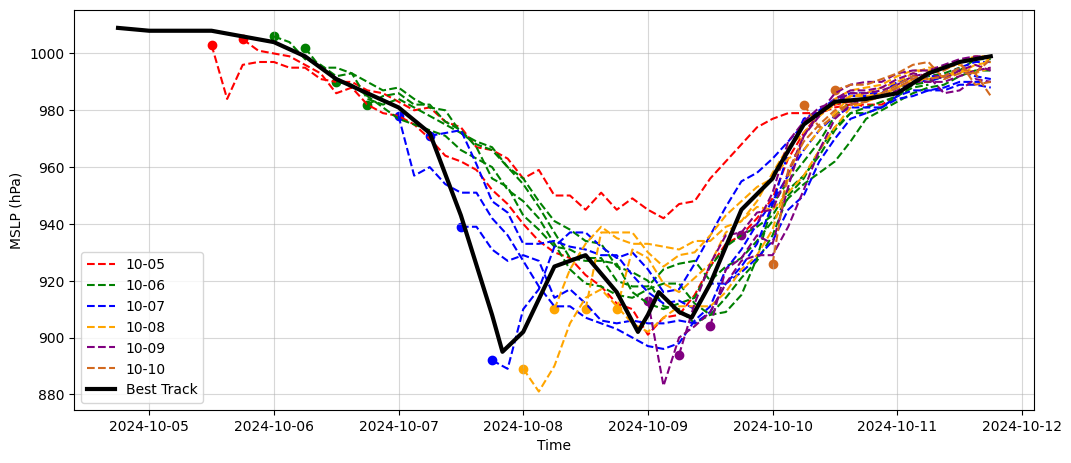

In [25]:
btDates = [dt.strptime(datetime, dateFormat) for datetime in tc.time]
runDates = [dt.strptime(run, runFormat) for run in stormMSLP.keys()]
stormStartMSLPs = [list(stormMSLP[key].values())[0] for key in stormMSLP.keys()]

cols = {5:"red", 6:"green", 7:"blue", 8:"orange", 9:"purple", 10:"chocolate"}
doneDays = []

mslpFig = plt.figure(figsize=(12, 5))
mslpAx = mslpFig.add_axes([0.1,0.1,0.8,0.8])

for run in stormMSLP.keys():
  #if run == list(stormMSLP.keys())[0]:
  mslpPlot = mslpAx.plot(stormMSLP[run].keys(), stormMSLP[run].values(), linestyle="--", color=cols[int(run[6:8])])
  if run[6:8] not in doneDays: mslpPlot[0].set_label(f"10-{run[6:8]}")
  doneDays.append(run[6:8])
  mslpAx.scatter(list(stormMSLP[run].keys())[0], list(stormMSLP[run].values())[0], color=cols[int(run[6:8])])

#Add points to indicate the start of a run
#mslpAx.scatter(runDates, stormStartMSLPs, color=cols[int(run[6:8])])

mslpAx.plot(btDates, tc.mslp, label="Best Track", color="black", linewidth=3)

mslpAx.set_xlabel("Time")
mslpAx.set_ylabel("MSLP (hPa)")
mslpAx.grid(alpha=0.5)
mslpAx.legend()

mslpFig.savefig(filepath + "/mslp_allRuns.png")

Plot model tracks

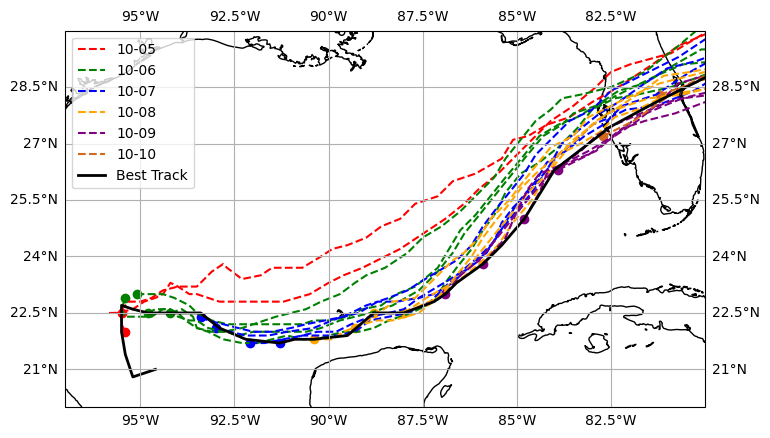

In [28]:
trackFig = plt.figure(figsize=(8, 5))
trackAx = trackFig.add_axes([0.1,0.1,0.8,0.8], projection=ccrs.PlateCarree())

cols = {5:"red", 6:"green", 7:"blue", 8:"orange", 9:"purple", 10:"chocolate"}
doneDays = []

for run in stormLat.keys():
  trackPlot = trackAx.plot(stormLon[run].values(), stormLat[run].values(), linestyle="--", color=cols[int(run[6:8])])
  if run[6:8] not in doneDays: trackPlot[0].set_label(f"10-{run[6:8]}")
  doneDays.append(run[6:8])
  trackAx.scatter(list(stormLon[run].values())[0], list(stormLat[run].values())[0], color=cols[int(run[6:8])])

trackAx.plot(tc.lon, tc.lat, color="black", linewidth=2, label="Best Track")

trackAx.legend()
trackAx.set_extent([-97, -80, 20, 30])
trackAx.add_feature(cft.COASTLINE)
trackAx.add_feature(cft.BORDERS)
trackAx.gridlines(draw_labels=True)